In [ ]:
#@title Imports
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv).
import os # Good for navigating your computer's files

# Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np    # Great for lists (arrays) of numbers

# Mount google drive to colab
from google.colab import drive
drive.mount('/content/drive')

# Quiet deprecation warnings
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Data Preparation (replace data path with the csv file in your drive)
data_path  = '/content/drive/MyDrive/Colab Notebooks/ML Projects/Project 1/data/Welti_Kuczynski_54sites.csv'
data = pd.read_csv(data_path)

In [ ]:
print(data.head())

                     Sample  Lat (Central Plot)  Long (Central Plot) State  tot_invert_abund       CTM  chew_herb_abund  detrit_abund  nect_abund  omniv_abund  parasit_abund  pred_abund  suck_herb_abund  unknown_abund  TempMeanYrMean  plant biomass (g/m2)  plant_perc_N_mean  plant_perc_C_mean  plant_perc_H_mean  plant_Al_mean  plant_As_mean  plant_B_mean  plant_Ba_mean  plant_Ca_mean  plant_Cd_mean  plant_Co_mean  plant_Cr_mean  plant_Cu_mean  plant_Fe_mean  plant_K_mean  plant_Li_mean  plant_Mg_mean  plant_Mn_mean  plant_Mo_mean  plant_Na_mean  plant_Ni_mean  plant_P_mean  plant_Pb_mean  plant_S_mean  plant_Si_mean  plant_Sr_mean  plant_Ti_mean  plant_Zn_mean
0               9MP_NotRoad           40.870100            -96.80650    NE              19.8  2.503785         1.000000           0.0    0.200000     3.000000            1.6    3.200000              7.0            3.8       10.869165                255.46           0.889710          39.407569           5.533577      33.116178    

In [ ]:
# number of rows in data
print(len(data))

54


<Axes: xlabel='TempMeanYrMean', ylabel='CTM'>

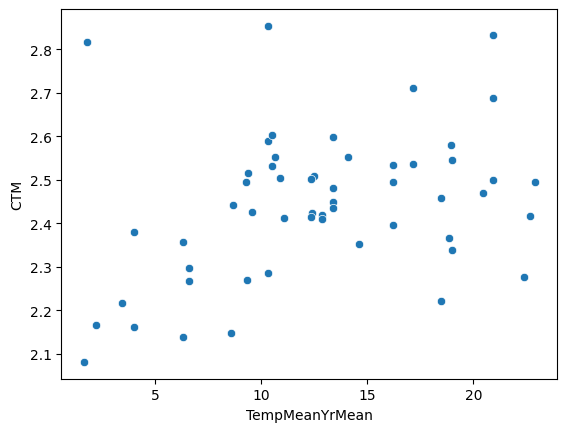

In [ ]:
#@title Data Visualization (Examples)
sns.scatterplot(x = 'TempMeanYrMean', y = 'CTM', data = data)

<Axes: xlabel='plant biomass (g/m2)', ylabel='CTM'>

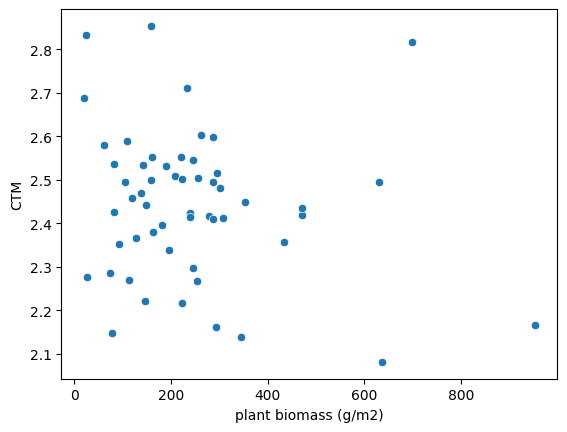

In [ ]:
sns.scatterplot(x = 'plant biomass (g/m2)', y = 'CTM', data = data)

# Single Linear Regression

In [ ]:
#@title Data Modeling (Temperature)
X_Single1 = data[['TempMeanYrMean']]
y = data[['CTM']]

In [ ]:
# set up our model
Linear_Single1 = LinearRegression()

# train the model
Linear_Single1.fit(X_Single1, y)

LinearRegression()

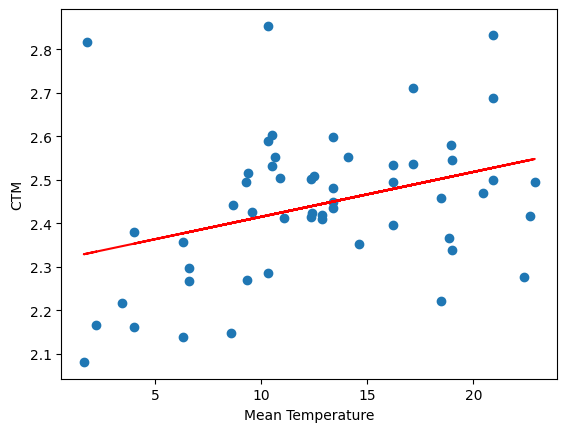

In [ ]:
y_pred_Single1 = Linear_Single1.predict(X_Single1)
plt.plot(X_Single1, y_pred_Single1, color='red')

plt.scatter(X_Single1, y)
plt.xlabel('Mean Temperature') # set the labels of the x and y axes
plt.ylabel('CTM')
plt.show()

In [ ]:
print('Slope m: ', Linear_Single1.coef_)

Slope m:  [[0.01029534]]


In [ ]:
print('Intercept b: ', Linear_Single1.intercept_)

Intercept b:  [2.31206441]


In [ ]:
print('Coefficient of determination R^2: %0.3f'%Linear_Single1.score(X_Single1, y))

Coefficient of determination R^2: 0.121


In [ ]:
#@title Data Modeling (Biomass)
X_Single2 = data[['plant biomass (g/m2)']]
y = data[['CTM']]

In [ ]:
# set up our model
Linear_Single2 = LinearRegression()

# train the model
Linear_Single2.fit(X_Single2, y)

LinearRegression()

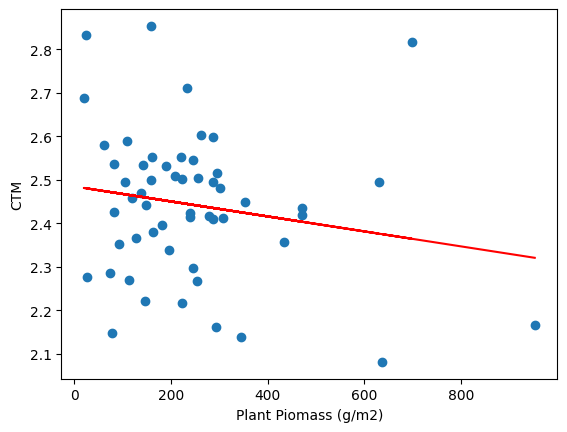

In [ ]:
y_pred_Single2 = Linear_Single2.predict(X_Single2)
plt.plot(X_Single2, y_pred_Single2, color='red')

plt.scatter(X_Single2, y)
plt.xlabel('Plant Piomass (g/m2)') # set the labels of the x and y axes
plt.ylabel('CTM')
plt.show()

In [ ]:
print('Slope m: ', Linear_Single2.coef_)

Slope m:  [[-0.00017214]]


In [ ]:
print('Intercept b: ', Linear_Single2.intercept_)

Intercept b:  [2.48464004]


In [ ]:
print('Coefficient of determination R^2: %0.3f'%Linear_Single2.score(X_Single2, y))
# pretty bad

Coefficient of determination R^2: 0.033


# Multiple Linear Regression

In [ ]:
#@title Data Modeling (Location)
X_Multiple1 = data[['Lat (Central Plot)', 'Long (Central Plot)']]
y = data[['CTM']]

# set up our model
Linear_Multiple1 = LinearRegression(fit_intercept = True)

# train the model
Linear_Multiple1.fit(X_Multiple1, y)

LinearRegression()

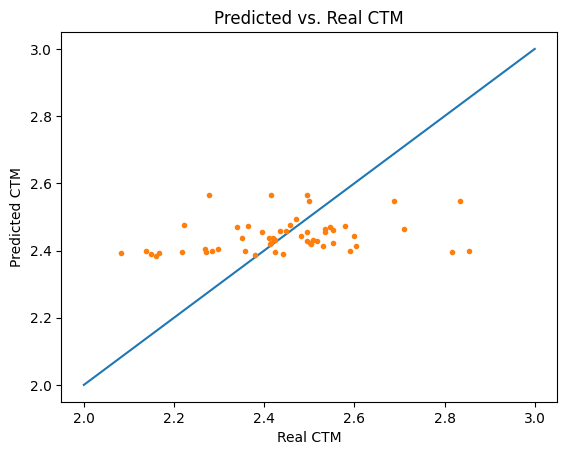

In [ ]:
plt.plot([2,3],[2,3]) # Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real CTM")
plt.xlabel("Real CTM")
plt.ylabel("Predicted CTM")
# Make our predictions using the model we just created.
y_pred_Multiple1 = Linear_Multiple1.predict(X_Multiple1)
# Add a scatterplot of predicted vs. real CTM
plt.plot(y, y_pred_Multiple1, '.')
plt.show()

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data['Prediction'] = y_pred_Multiple1
print (data)

                                               Sample  Lat (Central Plot)  Long (Central Plot) State  tot_invert_abund       CTM  chew_herb_abund  detrit_abund  nect_abund  omniv_abund  parasit_abund  pred_abund  suck_herb_abund  unknown_abund  TempMeanYrMean  plant biomass (g/m2)  plant_perc_N_mean  plant_perc_C_mean  plant_perc_H_mean  plant_Al_mean  plant_As_mean  plant_B_mean  plant_Ba_mean  plant_Ca_mean  plant_Cd_mean  plant_Co_mean  plant_Cr_mean  plant_Cu_mean  plant_Fe_mean  plant_K_mean  plant_Li_mean  plant_Mg_mean  plant_Mn_mean  plant_Mo_mean  plant_Na_mean  plant_Ni_mean  plant_P_mean  plant_Pb_mean  plant_S_mean  plant_Si_mean  plant_Sr_mean  plant_Ti_mean  plant_Zn_mean  Prediction
0                                         9MP_NotRoad           40.870100           -96.806500    NE         19.800000  2.503785         1.000000          0.00    0.200000     3.000000           1.60    3.200000         7.000000       3.800000       10.869165            255.460000           0

In [ ]:
data['CTM_deviation'] = y_pred_Multiple1 - y
print (data)

                                               Sample  Lat (Central Plot)  Long (Central Plot) State  tot_invert_abund       CTM  chew_herb_abund  detrit_abund  nect_abund  omniv_abund  parasit_abund  pred_abund  suck_herb_abund  unknown_abund  TempMeanYrMean  plant biomass (g/m2)  plant_perc_N_mean  plant_perc_C_mean  plant_perc_H_mean  plant_Al_mean  plant_As_mean  plant_B_mean  plant_Ba_mean  plant_Ca_mean  plant_Cd_mean  plant_Co_mean  plant_Cr_mean  plant_Cu_mean  plant_Fe_mean  plant_K_mean  plant_Li_mean  plant_Mg_mean  plant_Mn_mean  plant_Mo_mean  plant_Na_mean  plant_Ni_mean  plant_P_mean  plant_Pb_mean  plant_S_mean  plant_Si_mean  plant_Sr_mean  plant_Ti_mean  plant_Zn_mean  Prediction  CTM_deviation
0                                         9MP_NotRoad           40.870100           -96.806500    NE         19.800000  2.503785         1.000000          0.00    0.200000     3.000000           1.60    3.200000         7.000000       3.800000       10.869165            255.460

In [ ]:
sorted_data1 = data.sort_values("CTM_deviation")
Least_fit1 = sorted_data1.tail(5)
Least_fit2 = sorted_data1.head(5)

print (Least_fit1.head())
print (Least_fit2.head())

                    Sample  Lat (Central Plot)  Long (Central Plot) State  tot_invert_abund       CTM  chew_herb_abund  detrit_abund  nect_abund  omniv_abund  parasit_abund  pred_abund  suck_herb_abund  unknown_abund  TempMeanYrMean  plant biomass (g/m2)  plant_perc_N_mean  plant_perc_C_mean  plant_perc_H_mean  plant_Al_mean  plant_As_mean  plant_B_mean  plant_Ba_mean  plant_Ca_mean  plant_Cd_mean  plant_Co_mean  plant_Cr_mean  plant_Cu_mean  plant_Fe_mean  plant_K_mean  plant_Li_mean  plant_Mg_mean  plant_Mn_mean  plant_Mo_mean  plant_Na_mean  plant_Ni_mean  plant_P_mean  plant_Pb_mean  plant_S_mean  plant_Si_mean  plant_Sr_mean  plant_Ti_mean  plant_Zn_mean  Prediction  CTM_deviation
16  CPER SageField_NotRoad            40.81280          -104.733100    CO         28.200000  2.148665         0.400000           0.0    0.000000     0.200000            1.6    0.000000            21.40       4.600000        8.580409                 78.40           1.359610          42.581161           5.

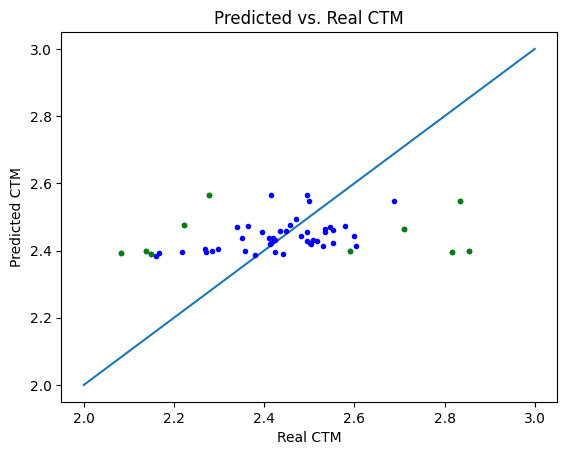

In [ ]:
plt.plot([2,3],[2,3]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real CTM")
plt.xlabel("Real CTM")
plt.ylabel("Predicted CTM")
#Make a scatterplot with several colors:
plt.plot(data.CTM,data.Prediction,'b.')
#Show least fits in one color
plt.plot(Least_fit1.CTM,Least_fit1.Prediction,'g.')
plt.plot(Least_fit2.CTM,Least_fit2.Prediction,'g.')
#Show the others in another color
plt.show()

In [ ]:
print('Coefficient of determination R^2: %0.3f'%Linear_Multiple1.score(X_Multiple1, y))
# pretty bad

Coefficient of determination R^2: 0.087


In [ ]:
#@title Data Modeling (Species Abundance)
X_Multiple2 = data[['tot_invert_abund', 'chew_herb_abund', 'detrit_abund', 'nect_abund', 'omniv_abund', 'parasit_abund', 'pred_abund', 'suck_herb_abund', 'unknown_abund']]
y = data[['CTM']]

# set up our model
Linear_Multiple2 = LinearRegression(fit_intercept = True)

# train the model
Linear_Multiple2.fit(X_Multiple2, y)

LinearRegression()

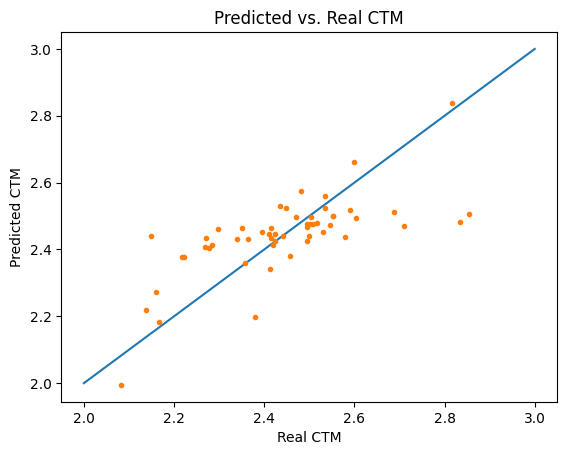

In [ ]:
plt.plot([2,3],[2,3]) # Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real CTM")
plt.xlabel("Real CTM")
plt.ylabel("Predicted CTM")
# Make our predictions using the model we just created.
y_pred_Multiple2 = Linear_Multiple2.predict(X_Multiple2)
# Add a scatterplot of predicted vs. real CTM
plt.plot(y, y_pred_Multiple2, '.')
plt.show()

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data['Prediction'] = y_pred_Multiple2
print (data)

                                               Sample  Lat (Central Plot)  Long (Central Plot) State  tot_invert_abund       CTM  chew_herb_abund  detrit_abund  nect_abund  omniv_abund  parasit_abund  pred_abund  suck_herb_abund  unknown_abund  TempMeanYrMean  plant biomass (g/m2)  plant_perc_N_mean  plant_perc_C_mean  plant_perc_H_mean  plant_Al_mean  plant_As_mean  plant_B_mean  plant_Ba_mean  plant_Ca_mean  plant_Cd_mean  plant_Co_mean  plant_Cr_mean  plant_Cu_mean  plant_Fe_mean  plant_K_mean  plant_Li_mean  plant_Mg_mean  plant_Mn_mean  plant_Mo_mean  plant_Na_mean  plant_Ni_mean  plant_P_mean  plant_Pb_mean  plant_S_mean  plant_Si_mean  plant_Sr_mean  plant_Ti_mean  plant_Zn_mean  Prediction  CTM_deviation
0                                         9MP_NotRoad           40.870100           -96.806500    NE         19.800000  2.503785         1.000000          0.00    0.200000     3.000000           1.60    3.200000         7.000000       3.800000       10.869165            255.460

In [ ]:
data['CTM_deviation'] = y_pred_Multiple2 - y
print (data)

                                               Sample  Lat (Central Plot)  Long (Central Plot) State  tot_invert_abund       CTM  chew_herb_abund  detrit_abund  nect_abund  omniv_abund  parasit_abund  pred_abund  suck_herb_abund  unknown_abund  TempMeanYrMean  plant biomass (g/m2)  plant_perc_N_mean  plant_perc_C_mean  plant_perc_H_mean  plant_Al_mean  plant_As_mean  plant_B_mean  plant_Ba_mean  plant_Ca_mean  plant_Cd_mean  plant_Co_mean  plant_Cr_mean  plant_Cu_mean  plant_Fe_mean  plant_K_mean  plant_Li_mean  plant_Mg_mean  plant_Mn_mean  plant_Mo_mean  plant_Na_mean  plant_Ni_mean  plant_P_mean  plant_Pb_mean  plant_S_mean  plant_Si_mean  plant_Sr_mean  plant_Ti_mean  plant_Zn_mean  Prediction  CTM_deviation
0                                         9MP_NotRoad           40.870100           -96.806500    NE         19.800000  2.503785         1.000000          0.00    0.200000     3.000000           1.60    3.200000         7.000000       3.800000       10.869165            255.460

In [ ]:
sorted_data1 = data.sort_values("CTM_deviation")
Least_fit1 = sorted_data1.tail(5)
Least_fit2 = sorted_data1.head(5)

print (Least_fit1.head())
print (Least_fit2.head())

                     Sample  Lat (Central Plot)  Long (Central Plot) State  tot_invert_abund       CTM  chew_herb_abund  detrit_abund  nect_abund  omniv_abund  parasit_abund  pred_abund  suck_herb_abund  unknown_abund  TempMeanYrMean  plant biomass (g/m2)  plant_perc_N_mean  plant_perc_C_mean  plant_perc_H_mean  plant_Al_mean  plant_As_mean  plant_B_mean  plant_Ba_mean  plant_Ca_mean  plant_Cd_mean  plant_Co_mean  plant_Cr_mean  plant_Cu_mean  plant_Fe_mean  plant_K_mean  plant_Li_mean  plant_Mg_mean  plant_Mn_mean  plant_Mo_mean  plant_Na_mean  plant_Ni_mean  plant_P_mean  plant_Pb_mean  plant_S_mean  plant_Si_mean  plant_Sr_mean  plant_Ti_mean  plant_Zn_mean  Prediction  CTM_deviation
30      Llano River_NotRoad           30.476450           -99.779683    TX          5.333333  2.222222         1.666667           0.0    0.333333     0.333333            0.0    0.666667              1.0       1.333333       18.455064                145.50           2.096384          41.918945           

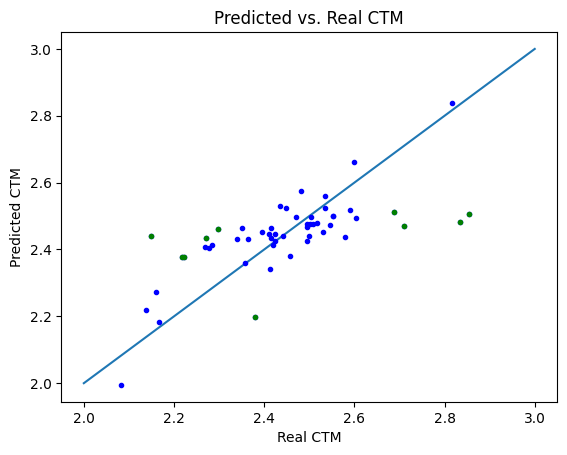

In [ ]:
plt.plot([2,3],[2,3]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real CTM")
plt.xlabel("Real CTM")
plt.ylabel("Predicted CTM")
#Make a scatterplot with several colors:
plt.plot(data.CTM,data.Prediction,'b.')
#Show least fits in one color
plt.plot(Least_fit1.CTM,Least_fit1.Prediction,'g.')
plt.plot(Least_fit2.CTM,Least_fit2.Prediction,'g.')
#Show the others in another color
plt.show()

In [ ]:
print('Coefficient of determination R^2: %0.3f'%Linear_Multiple2.score(X_Multiple2, y))
# pretty good

Coefficient of determination R^2: 0.487


In [ ]:
#@title Data Modeling (Plant Sodium)
X_Multiple3 = data[['plant_perc_N_mean', 'plant_perc_C_mean', 'plant_perc_H_mean', 'plant_Al_mean', 'plant_As_mean', 'plant_B_mean', 'plant_Ba_mean', 'plant_Ca_mean', 'plant_Cd_mean', 'plant_Co_mean', 'plant_Cr_mean', 'plant_Cu_mean', 'plant_Fe_mean', 'plant_K_mean', 'plant_Li_mean', 'plant_Mg_mean', 'plant_Mn_mean', 'plant_Mo_mean', 'plant_Na_mean', 'plant_Ni_mean', 'plant_P_mean', 'plant_Pb_mean', 'plant_S_mean', 'plant_Si_mean', 'plant_Sr_mean', 'plant_Ti_mean', 'plant_Zn_mean']]
y = data[['CTM']]

# set up our model
Linear_Multiple3 = LinearRegression(fit_intercept = True)

# train the model
Linear_Multiple3.fit(X_Multiple3, y)

LinearRegression()

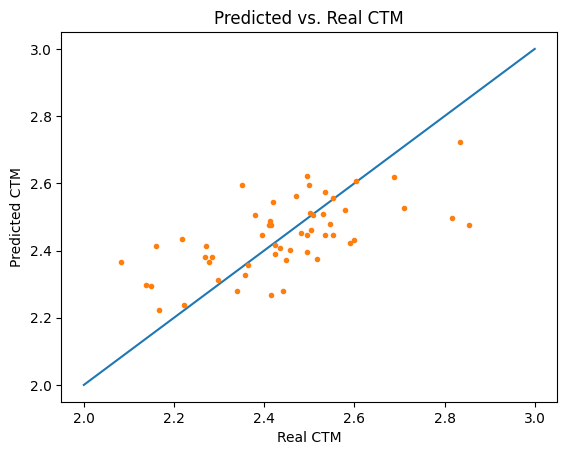

In [ ]:
plt.plot([2,3],[2,3]) # Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real CTM")
plt.xlabel("Real CTM")
plt.ylabel("Predicted CTM")
# Make our predictions using the model we just created.
y_pred_Multiple3 = Linear_Multiple3.predict(X_Multiple3)
# Add a scatterplot of predicted vs. real CTM
plt.plot(y, y_pred_Multiple3, '.')
plt.show()

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data['Prediction'] = y_pred_Multiple3
print (data)

                                               Sample  Lat (Central Plot)  Long (Central Plot) State  tot_invert_abund       CTM  chew_herb_abund  detrit_abund  nect_abund  omniv_abund  parasit_abund  pred_abund  suck_herb_abund  unknown_abund  TempMeanYrMean  plant biomass (g/m2)  plant_perc_N_mean  plant_perc_C_mean  plant_perc_H_mean  plant_Al_mean  plant_As_mean  plant_B_mean  plant_Ba_mean  plant_Ca_mean  plant_Cd_mean  plant_Co_mean  plant_Cr_mean  plant_Cu_mean  plant_Fe_mean  plant_K_mean  plant_Li_mean  plant_Mg_mean  plant_Mn_mean  plant_Mo_mean  plant_Na_mean  plant_Ni_mean  plant_P_mean  plant_Pb_mean  plant_S_mean  plant_Si_mean  plant_Sr_mean  plant_Ti_mean  plant_Zn_mean  Prediction  CTM_deviation
0                                         9MP_NotRoad           40.870100           -96.806500    NE         19.800000  2.503785         1.000000          0.00    0.200000     3.000000           1.60    3.200000         7.000000       3.800000       10.869165            255.460

In [ ]:
data['CTM_deviation'] = y_pred_Multiple3 - y
print (data)

                                               Sample  Lat (Central Plot)  Long (Central Plot) State  tot_invert_abund       CTM  chew_herb_abund  detrit_abund  nect_abund  omniv_abund  parasit_abund  pred_abund  suck_herb_abund  unknown_abund  TempMeanYrMean  plant biomass (g/m2)  plant_perc_N_mean  plant_perc_C_mean  plant_perc_H_mean  plant_Al_mean  plant_As_mean  plant_B_mean  plant_Ba_mean  plant_Ca_mean  plant_Cd_mean  plant_Co_mean  plant_Cr_mean  plant_Cu_mean  plant_Fe_mean  plant_K_mean  plant_Li_mean  plant_Mg_mean  plant_Mn_mean  plant_Mo_mean  plant_Na_mean  plant_Ni_mean  plant_P_mean  plant_Pb_mean  plant_S_mean  plant_Si_mean  plant_Sr_mean  plant_Ti_mean  plant_Zn_mean  Prediction  CTM_deviation
0                                         9MP_NotRoad           40.870100           -96.806500    NE         19.800000  2.503785         1.000000          0.00    0.200000     3.000000           1.60    3.200000         7.000000       3.800000       10.869165            255.460

In [ ]:
sorted_data1 = data.sort_values("CTM_deviation")
Least_fit1 = sorted_data1.tail(5)
Least_fit2 = sorted_data1.head(5)

print (Least_fit1.head())
print (Least_fit2.head())

                       Sample  Lat (Central Plot)  Long (Central Plot) State  tot_invert_abund       CTM  chew_herb_abund  detrit_abund  nect_abund  omniv_abund  parasit_abund  pred_abund  suck_herb_abund  unknown_abund  TempMeanYrMean  plant biomass (g/m2)  plant_perc_N_mean  plant_perc_C_mean  plant_perc_H_mean  plant_Al_mean  plant_As_mean  plant_B_mean  plant_Ba_mean  plant_Ca_mean  plant_Cd_mean  plant_Co_mean  plant_Cr_mean  plant_Cu_mean  plant_Fe_mean  plant_K_mean  plant_Li_mean  plant_Mg_mean  plant_Mn_mean  plant_Mo_mean  plant_Na_mean  plant_Ni_mean  plant_P_mean  plant_Pb_mean  plant_S_mean  plant_Si_mean  plant_Sr_mean  plant_Ti_mean  plant_Zn_mean  Prediction  CTM_deviation
34           Oak Lake_NotRoad           44.504650           -96.530517    SD             49.75  2.138439              6.5           0.5         0.0     1.250000            0.0    3.000000        20.250000      18.250000        6.328793                345.52           0.942851          42.260173       

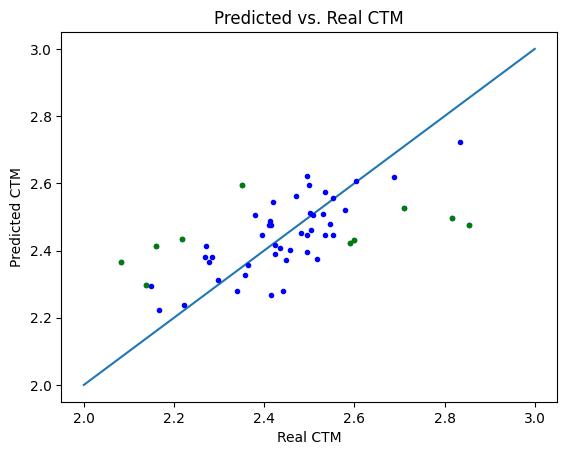

In [ ]:
plt.plot([2,3],[2,3]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real CTM")
plt.xlabel("Real CTM")
plt.ylabel("Predicted CTM")
#Make a scatterplot with several colors:
plt.plot(data.CTM,data.Prediction,'b.')
#Show least fits in one color
plt.plot(Least_fit1.CTM,Least_fit1.Prediction,'g.')
plt.plot(Least_fit2.CTM,Least_fit2.Prediction,'g.')
#Show the others in another color
plt.show()

In [ ]:
print('Coefficient of determination R^2: %0.3f'%Linear_Multiple3.score(X_Multiple3, y))

Coefficient of determination R^2: 0.398


# Conclusion & Result

This Machine Learning Algorithm analyzes the effect of Temperature and Biomass on CTM (Single Linear Regression) and trains a model for predicting CTM based on Location, Species Abundance, and Plant Sodium (Multiple Linear Regression).

CTM relates to the overall shape of the trophic pyramid, where a high CTM value indicates a top-heavy trophic pyramid (ecosystem is less sustainable) and a low CTM value indicates a low-heavy trophic pyramid (ecosystem is more sustainable)

The result of the algorithm shows that there is a direct relationship between Temperature & CTM, while there is an indirect relationship between Biomass & CTM.

The performance of the predictive model is overall weak in predicting CTM as compared to real CTM for Location, Species Abundance, and Plant Soidum.

In general, an ecosystem is more sustainable and resilient to environmental changes when there's an indirect relationship between environmental factors and CTM.

# Outlook & Discussion

The Linear Regression Model does not seem to be the best Machine Learning Model to model the relationship between environmental factors and ecosystem sustainability. The expected solution for this is to use another Machine Learning Model that fits the given data better.

The low coefficient of determination of R^2 value suggests that the prediction made by the Linear Regression Model is weak and less reliable. This can be expectedly improved by further model retraining process.